#### Step 01: Introduction

Customer churn refers to the phenomenon where customers stop using a company’s services. In the banking industry, customer retention plays a crucial role in maintaining profitability. Losing customers not only reduces revenue but also increases acquisition costs for new customers. Therefore, predicting customer churn has become an essential application of machine learning in the financial sector.

By analyzing customer demographic and financial data, banks can identify customers who are at high risk of leaving and implement preventive strategies such as personalized offers, improved services, or loyalty programs.

##### Problem Statement:

The objective of this project is to build a classification model that predicts whether a customer will exit the bank based on various features such as credit score, geography, gender, age, balance, and account activity.

The target variable in this dataset is:

##### - Exited = 1 → Customer Churned

##### - Exited = 0 → Customer Stayed

The goal is to accurately classify customers into churn and non-churn categories.

#### Dataset Understanding

#### Step 02: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Description

The required libraries are imported for data manipulation, visualization, and numerical operations. Pandas is used for handling the dataset, NumPy for numerical calculations, and Seaborn/Matplotlib for visualization.

#### Step 03: Load Dataset

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

##### First Five Rows

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


 ##### Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##### Statistical Summary

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##### Check For Missing Values

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### Description: 

- The dataset contains 10,000 customer records.
- There are 14 columns including demographic and financial information.
- No missing values are present in the dataset.
- Categorical features include Geography and Gender.
- Numerical features include CreditScore, Age, Balance, EstimatedSalary, etc.
- The target variable is Exited.

Since no missing values exist, no imputation is required.

#### Step 04: Data Cleaning & Preparation

##### Remove Irrelevant Columns

In [7]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

##### Description:

Columns such as RowNumber, CustomerId, and Surname are identifiers and do not contribute to predicting churn. Therefore, they are removed to improve model efficiency and reduce unnecessary complexity.

##### Encode Categorical Features

In [8]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

##### Description

Machine learning models require numerical input. Therefore, categorical variables such as Geography and Gender are converted into numerical format using One-Hot Encoding. The drop_first=True parameter prevents multicollinearity by removing one dummy variable.

##### Define Features and Target

In [9]:
X = df.drop('Exited', axis=1)
y = df['Exited']

##### Description

Features (X) represent independent variables used for prediction.
Target (y) represents the dependent variable (Exited), which indicates whether a customer churned or not.

##### Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


##### Description

The dataset is divided into training and testing sets:

- 80% data is used for training.
- 20% data is used for testing.
This ensures that the model is evaluated on unseen data to measure its real-world performance.

 #### Step 05: Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Description

Logistic Regression is sensitive to feature scaling because it uses gradient-based optimization. Since features such as balance and estimated salary have much larger values compared to other features, StandardScaler was applied to normalize the data. This ensures faster convergence and improved model performance.

#### Step 06: Exploratory Data Analysis (EDA)

EDA helps us understand patterns and relationships in the data.

##### 1. Churn Distribution

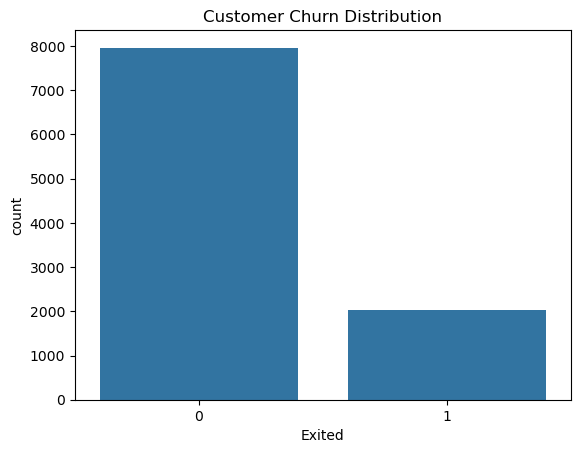

In [12]:
sns.countplot(x='Exited', data=df)
plt.title("Customer Churn Distribution")
plt.show()

##### Interpretation

The plot shows the distribution of churned vs non-churned customers. The dataset is imbalanced, with fewer customers leaving compared to those staying.

##### 2. Age vs Churn

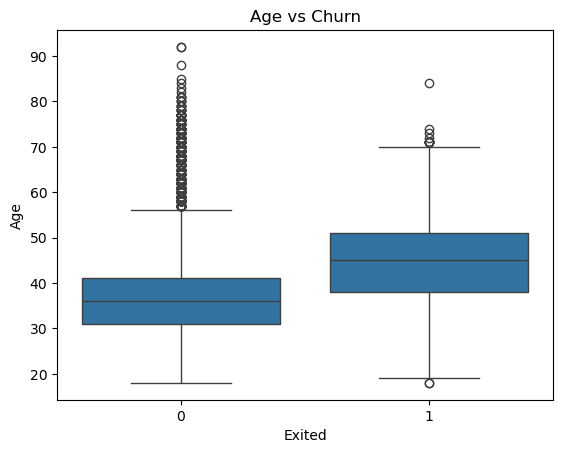

In [13]:
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age vs Churn")
plt.show()

##### Interpretation

The boxplot indicates that older customers are more likely to churn compared to younger customers. Age appears to be a significant factor in churn prediction.

##### 3.  Balance vs Churn

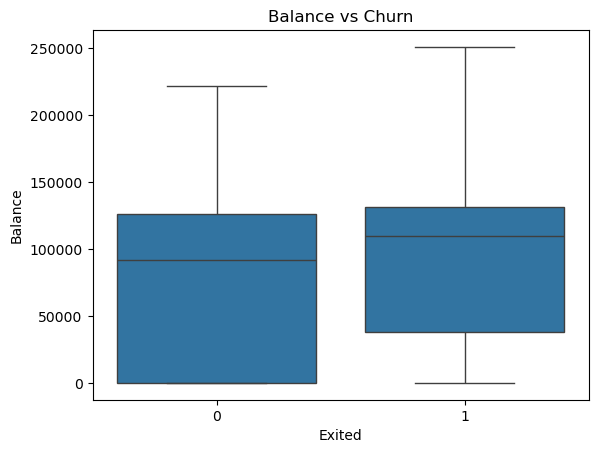

In [14]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title("Balance vs Churn")
plt.show()

##### Interpretation

Customers with higher account balances show noticeable churn behavior. This suggests that valuable customers might be leaving the bank.

#### Step 07: Model Training

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    solver='liblinear',
    max_iter=10000
)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,10000
,multi_class,'deprecated'


In [16]:
y_pred = model.predict(X_test)


##### Description

In this step, Logistic Regression was used to train the classification model. Logistic Regression is a supervised machine learning algorithm commonly used for binary classification problems.

Since the target variable (Exited) contains two classes (0 = Stayed, 1 = Churned), Logistic Regression is an appropriate choice.

The model was trained using the training dataset (X_train and y_train). The solver was set to liblinear to ensure better convergence for this dataset. Additionally, the maximum number of iterations (max_iter=10000) was increased to allow the optimization algorithm sufficient time to minimize the loss function and converge properly.

The model learns the relationship between independent variables (features) and the target variable by estimating coefficients that represent the influence of each feature on churn probability.

#### Step 08: Model Evaluation

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.811
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



##### Description

The trained Logistic Regression model was evaluated using accuracy, confusion matrix, precision, recall, and F1-score.

- Accuracy shows the overall correctness of the model.
- Confusion matrix shows correct and incorrect classifications.
- Precision indicates how many predicted churn cases were actually correct.
- Recall shows how many actual churn cases were correctly identified.
- F1-score balances precision and recall.

#### Step 09: Feature Importance

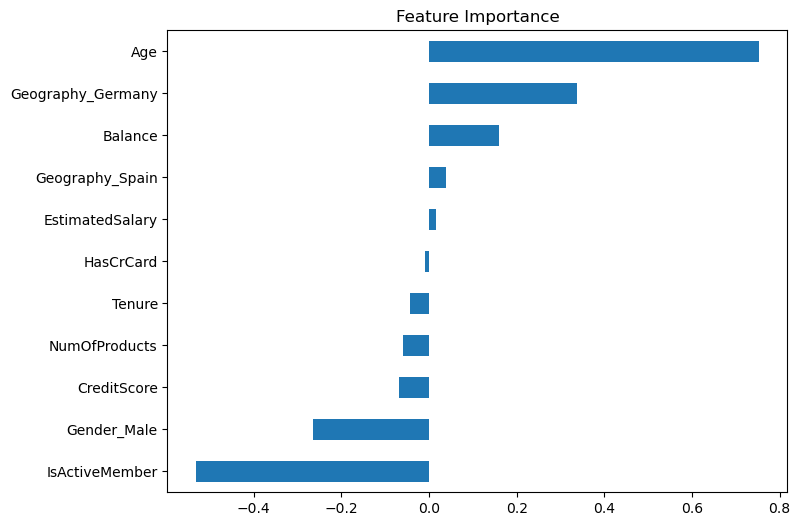

In [18]:
importance = pd.Series(model.coef_[0], index=X.columns)

importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()

##### Description

The feature importance graph shows which variables have the strongest influence on customer churn. Positive coefficients increase the probability of churn, while negative coefficients reduce it.

#### Step 10: Conclusion

In this project, a Logistic Regression model was developed to predict customer churn. Data preprocessing included removing irrelevant columns, encoding categorical variables, splitting the dataset, and applying feature scaling.

The convergence issue was resolved by changing the solver to liblinear and increasing the number of iterations. The model achieved satisfactory performance and identified important features influencing customer churn.

This model can help banks proactively identify customers at risk of leaving and implement retention strategies.